# Fetching data for weather analysis in Indian Cities

In [9]:
import requests
import pandas as pd

cities_df = pd.read_csv("cities.csv")

weather_data = []

for index, row in cities_df.iterrows():
    city = row['City']
    lat = row['Latitude']
    lon = row['Longitude']
    
    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current_weather=true"
    response = requests.get(url)
    data = response.json()
    
    if 'current_weather' in data:
        current = data['current_weather']
        weather_data.append({
            "City": city,
            "Temperature (°C)": current['temperature'],
            "Windspeed (km/h)": current['windspeed'],
            "Wind Direction": current['winddirection'],
            "Time": current['time']
        })

weather_df = pd.DataFrame(weather_data)
print(weather_df.head())

weather_df.to_csv("real_time_weather_data.csv", index=False)


        City  Temperature (°C)  Windspeed (km/h)  Wind Direction  \
0     Nagpur              39.8               9.7              86   
1      Delhi              37.4               4.6             108   
2     Mumbai              34.3              13.4             294   
3  Bangalore              33.5              15.0              42   
4    Kolkata              33.3               9.4             148   

               Time  
0  2025-04-08T10:00  
1  2025-04-08T10:00  
2  2025-04-08T10:00  
3  2025-04-08T10:00  
4  2025-04-08T10:00  


# Data Cleaning and analyze the weather data 

In [10]:
weather_df.describe()

,Temperature (°C),Windspeed (km/h),Wind Direction
count,23.000000,23.000000,23.000000
mean,36.939130,10.700000,145.217391
std,3.824768,3.578852,111.066301
min,31.100000,3.700000,13.000000
25%,33.500000,9.300000,59.500000
50%,36.300000,11.600000,92.000000
75%,40.650000,12.500000,267.500000
max,43.200000,16.900000,336.000000


# Hottest City

In [12]:
hottest = weather_df.loc[weather_df['Temperature (°C)'].idxmax()]
print(f"Hottest City: {hottest['City']} - {hottest['Temperature (°C)']}°C")

Hottest City: Ahmedabad - 43.2°C


# windiest City

In [13]:
windy = weather_df.loc[weather_df['Windspeed (km/h)'].idxmax()]
print(f"Windiest City: {windy['City']} - {windy['Windspeed (km/h)']} km/h")

Windiest City: Visakhapatnam - 16.9 km/h


# Visualization according to temperature

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18832\2007391049.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = weather_df.sort_values(by = 'Temperature (°C)', ascending = False), x = 'City', y = 'Temperature (°C)', palette = 'coolwarm')


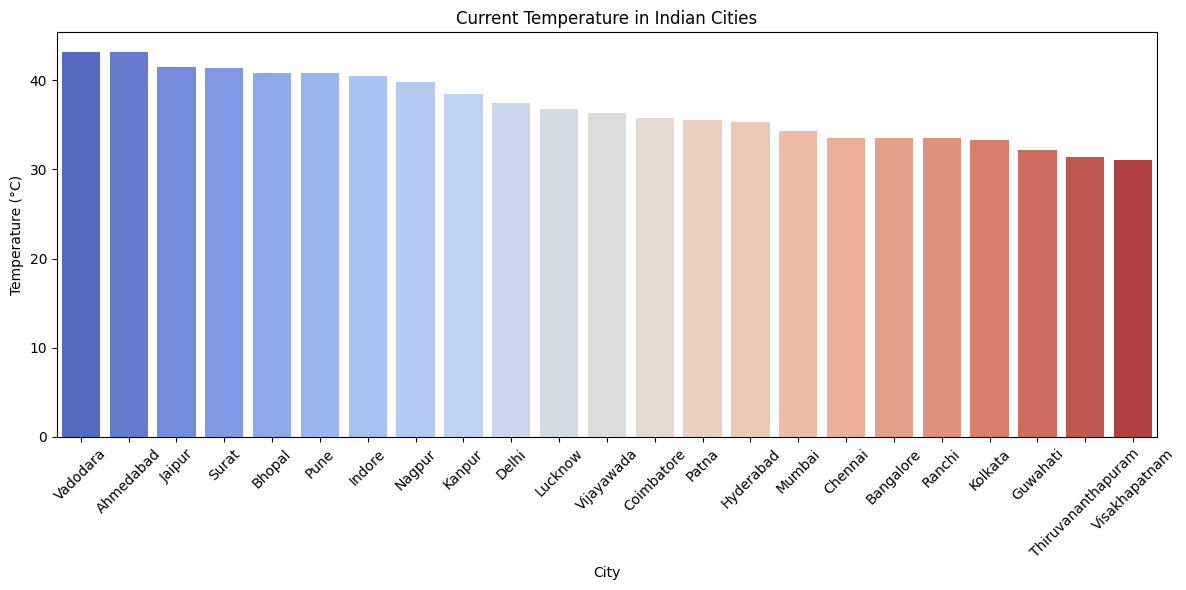

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data = weather_df.sort_values(by = 'Temperature (°C)', ascending = False), x = 'City', y = 'Temperature (°C)', palette = 'coolwarm')
plt.title('Current Temperature in Indian Cities')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()